In [1]:
import importlib
import skfda

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Utils import paths


importlib.reload(paths)

<module 'Utils.paths' from 'C:\\Users\\jllav\\IdeaProjects\\TFM\\Utils\\paths.py'>

In [2]:
X = pd.read_pickle(f'{paths.CC_DATA_PATH}/X.pickle')
y = pd.read_pickle(f'{paths.CC_DATA_PATH}/y.pickle')
X.shape, y.shape

((536, 2399), (536,))

In [3]:
X.index[X.isna().sum(axis=1) != 0]

Int64Index([], dtype='int64')

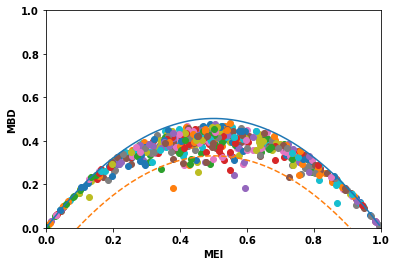

In [4]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
outliergram = skfda.exploratory.visualization.Outliergram(fdata=X_fd)
outliergram.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram.png")

In [5]:
outliergram_outliers_idx_CC = X.index[np.where(outliergram.outlier_detector.fit_predict(X_fd) == -1, True, False)]
outliergram_outliers_idx_CC

Int64Index([1007, 1009, 1027, 1035, 1055, 1075, 1081, 1102, 1169, 1197, 1209,
            1222, 1302, 1312, 1345, 1357, 1359, 1388, 1409, 1418, 1456, 2023,
            2024],
           dtype='int64')

In [6]:
y[outliergram_outliers_idx_CC].value_counts()

0    15
1     8
Name: ph, dtype: int64

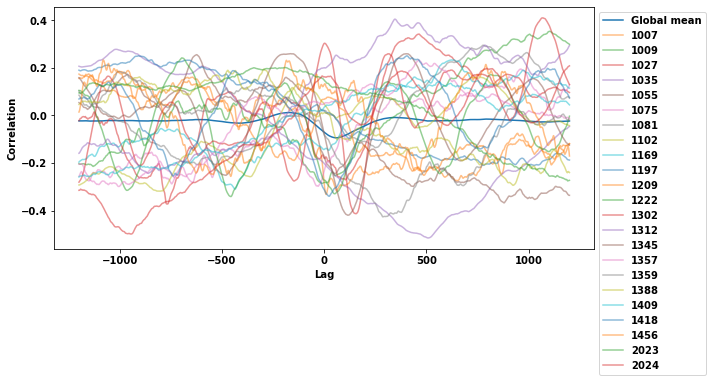

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in outliergram_outliers_idx_CC:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram_outliers.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_Outliergram_outliers.png")

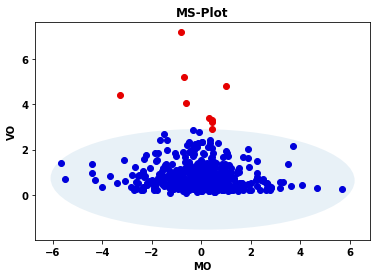

In [8]:
ms_plot = skfda.exploratory.visualization.MagnitudeShapePlot(fdata=X_fd)
ms_plot.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot.png")

In [9]:
ms_outliers_idx_CC = X.index[np.where(ms_plot.outlier_detector.fit_predict(X_fd) == -1, True, False)]
ms_outliers_idx_CC

Int64Index([1009, 1027, 1035, 1055, 1197, 1198, 1302, 1312, 2024], dtype='int64')

In [10]:
y[ms_outliers_idx_CC].value_counts()

0    5
1    4
Name: ph, dtype: int64

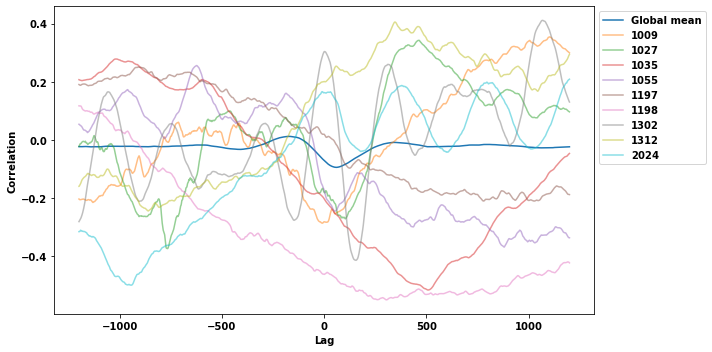

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in ms_outliers_idx_CC:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation')
fig.tight_layout()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot_outliers.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MSPlot_outliers.png")

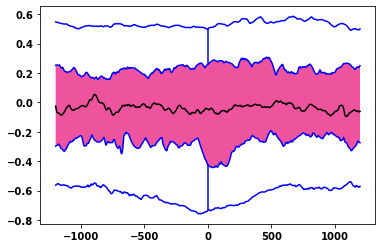

In [12]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
mbd_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_boxplot.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MBD_Boxplot.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_MBD_Boxplot.png")

In [13]:
mbd_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_outliers_idx_CC = X.index[np.where(mbd_outlier_detector.fit_predict(X_fd) == -1, True, False)]
mbd_outliers_idx_CC

Int64Index([], dtype='int64')

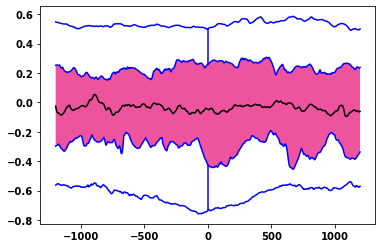

In [14]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
id_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.IntegratedDepth())
id_boxplot.plot()
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_ID_Boxplot.pdf")
plt.savefig(f"{paths.CC_DATA_PLOTS}/CC_ID_Boxplot.png")

In [15]:
id_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.IntegratedDepth())
id_outliers_idx_CC = X.index[np.where(id_outlier_detector.fit_predict(X_fd) == -1, True, False)]
id_outliers_idx_CC

Int64Index([], dtype='int64')

In [16]:
X = pd.read_pickle(f'{paths.CDCOR_DATA_PATH}/X.pickle')
y = pd.read_pickle(f'{paths.CDCOR_DATA_PATH}/y.pickle')
X.shape, y.shape

((536, 2399), (536,))

In [17]:
X.index[X.isna().sum(axis=1) != 0]

Int64Index([], dtype='int64')

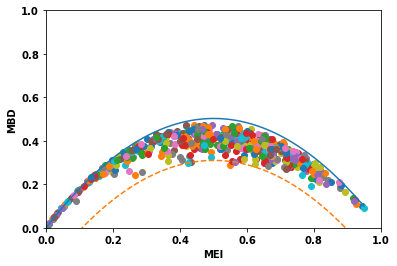

In [18]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
outliergram = skfda.exploratory.visualization.Outliergram(fdata=X_fd)
outliergram.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram.png")

In [19]:
outliergram_outliers_idx_CDCOR = X.index[np.where(outliergram.outlier_detector.fit_predict(X_fd) == -1, True, False)]
outliergram_outliers_idx_CDCOR

Int64Index([1022, 1505], dtype='int64')

In [20]:
y[outliergram_outliers_idx_CDCOR].value_counts()

0    2
Name: ph, dtype: int64

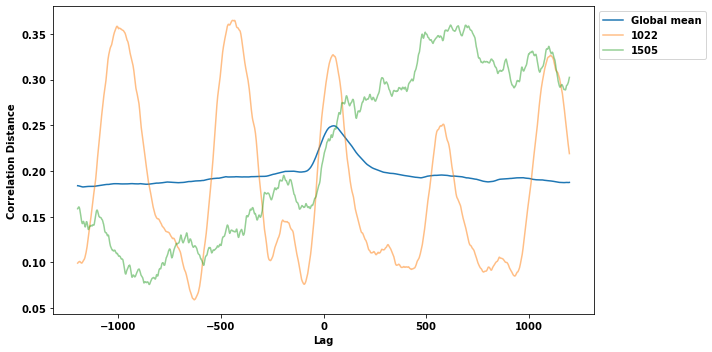

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in outliergram_outliers_idx_CDCOR:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation Distance')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_Outliergram_outliers.png")

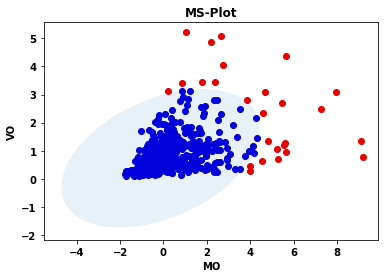

In [22]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
ms_plot = skfda.exploratory.visualization.MagnitudeShapePlot(fdata=X_fd)
ms_plot.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot.png")

In [23]:
ms_outliers_idx_CDCOR = X.index[np.where(ms_plot.outlier_detector.fit_predict(X_fd) == -1, True, False)]
ms_outliers_idx_CDCOR

Int64Index([1019, 1022, 1045, 1047, 1066, 1086, 1120, 1147, 1157, 1181, 1189,
            1198, 1306, 1311, 1318, 1330, 1350, 1397, 1415, 1440, 1458, 1469,
            1495, 2012, 2024, 2035],
           dtype='int64')

In [24]:
y[ms_outliers_idx_CDCOR].value_counts()

0    17
1     9
Name: ph, dtype: int64

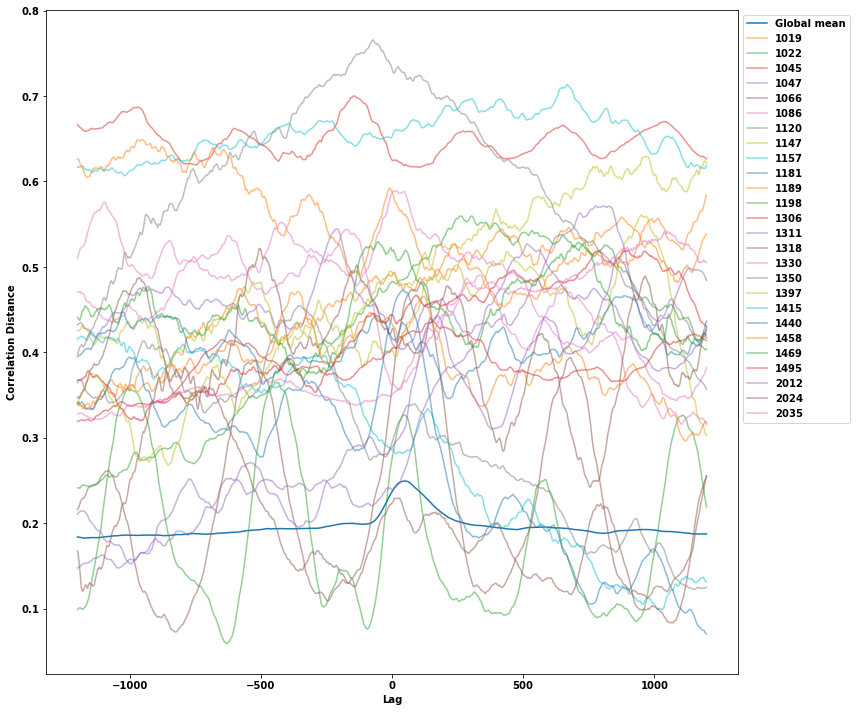

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in ms_outliers_idx_CDCOR:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation Distance')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MSPlot_outliers.png")

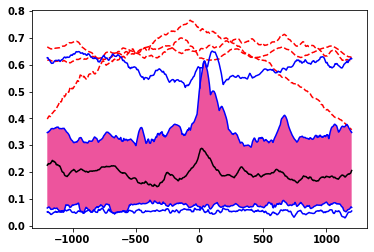

In [26]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
mbd_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_boxplot.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot.png")

In [27]:
mbd_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_outliers_idx_CDCOR = X.index[np.where(mbd_outlier_detector.fit_predict(X_fd) == -1, True, False)]
mbd_outliers_idx_CDCOR

Int64Index([1045, 1350, 1415], dtype='int64')

In [28]:
y[mbd_outliers_idx_CDCOR].value_counts()

0    2
1    1
Name: ph, dtype: int64

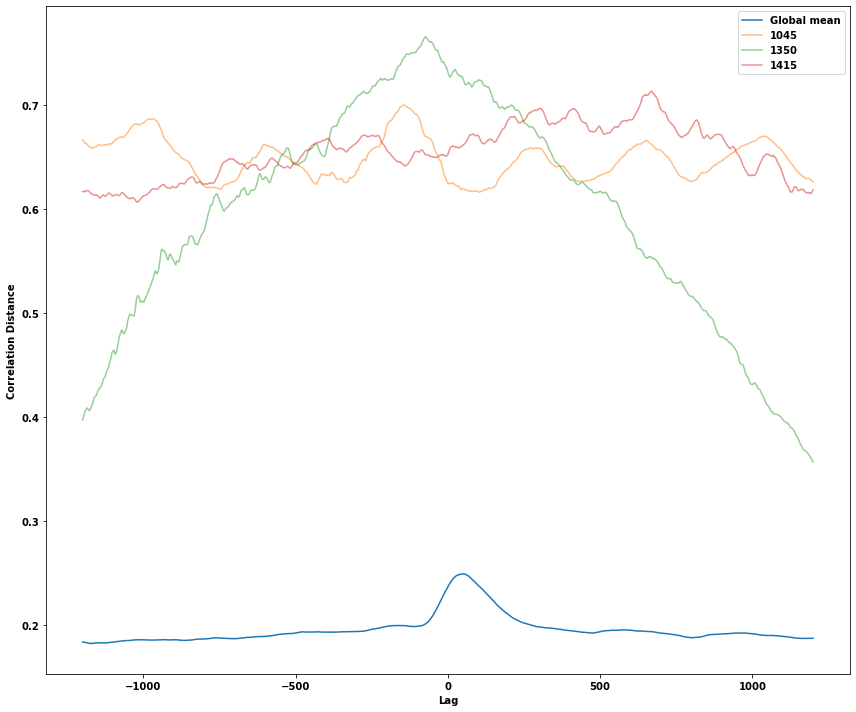

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in mbd_outliers_idx_CDCOR:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation Distance')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_MBD_Boxplot_outliers.png")

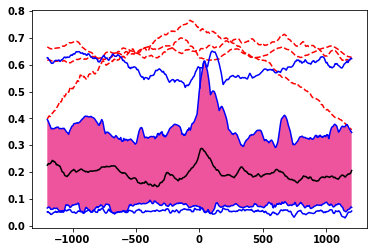

In [30]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
id_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.IntegratedDepth())
id_boxplot.plot()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot.png")

In [31]:
id_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.IntegratedDepth())
id_outliers_idx_CDCOR = X.index[np.where(id_outlier_detector.fit_predict(X_fd) == -1, True, False)]
id_outliers_idx_CDCOR

Int64Index([1045, 1350, 1415], dtype='int64')

In [32]:
y[id_outliers_idx_CDCOR].value_counts()

0    2
1    1
Name: ph, dtype: int64

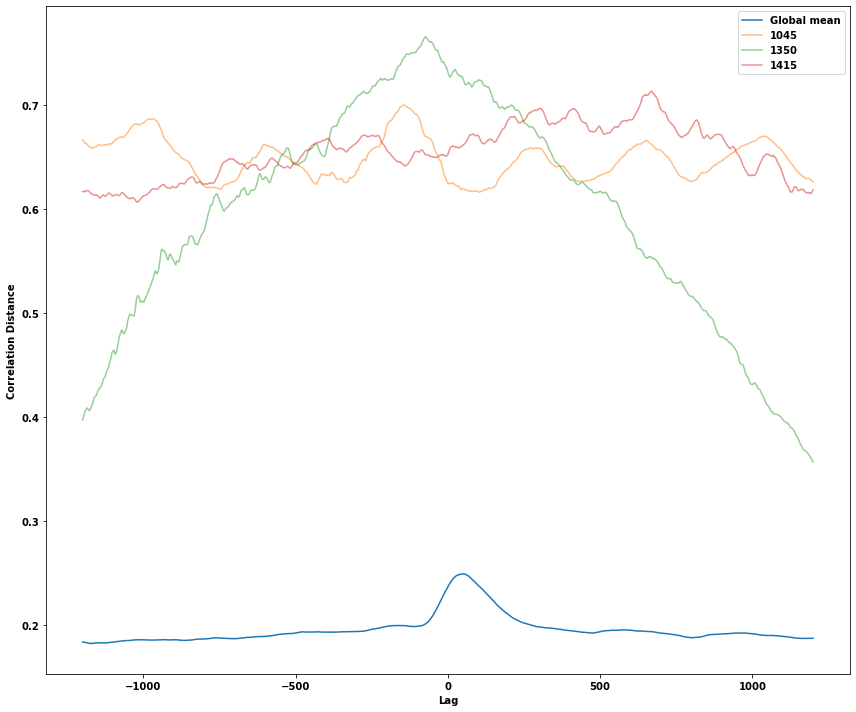

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in id_outliers_idx_CDCOR:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Correlation Distance')
fig.tight_layout()
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot_outliers.pdf")
plt.savefig(f"{paths.CDCOR_DATA_PLOTS}/CDCOR_ID_Boxplot_outliers.png")

In [34]:
X = pd.read_pickle(f'{paths.FFT_DATA_PATH}/X.pickle')
y = pd.read_pickle(f'{paths.FFT_DATA_PATH}/y.pickle')
X.shape, y.shape

((536, 540), (536,))

In [35]:
X.index[X.isna().sum(axis=1) != 0]

Int64Index([], dtype='int64')

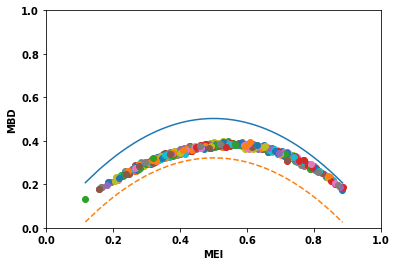

In [36]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
outliergram = skfda.exploratory.visualization.Outliergram(fdata=X_fd)
outliergram.plot()
plt.savefig(f"{paths.FFT_DATA_PLOTS}/id_outliers_idx_CDCOR_Outliergram.pdf")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_Outliergram.png")

In [37]:
outliergram_outliers_idx_FFT = X.index[np.where(outliergram.outlier_detector.fit_predict(X_fd) == -1, True, False)]
outliergram_outliers_idx_FFT

Int64Index([], dtype='int64')

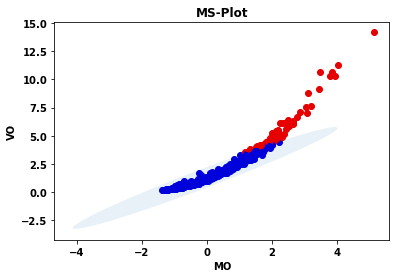

In [38]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
ms_plot = skfda.exploratory.visualization.MagnitudeShapePlot(fdata=X_fd)
ms_plot.plot()
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MSPlot.pdf")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MSPlot.png")

In [39]:
ms_outliers_idx_FFT = X.index[np.where(ms_plot.outlier_detector.fit_predict(X_fd) == -1, True, False)]
ms_outliers_idx_FFT

Int64Index([1009, 1013, 1018, 1039, 1043, 1044, 1049, 1052, 1054, 1059, 1065,
            1072, 1073, 1080, 1087, 1108, 1121, 1131, 1137, 1145, 1156, 1164,
            1174, 1196, 1199, 1210, 1228, 1235, 1239, 1261, 1268, 1270, 1278,
            1282, 1286, 1291, 1296, 1297, 1301, 1310, 1313, 1318, 1338, 1345,
            1357, 1358, 1366, 1372, 1374, 1380, 1392, 1407, 1414, 1422, 1424,
            1428, 1431, 1432, 1434, 1448, 1466, 1470, 1501, 2013, 2021],
           dtype='int64')

In [40]:
y[ms_outliers_idx_FFT].value_counts()

0    36
1    29
Name: ph, dtype: int64

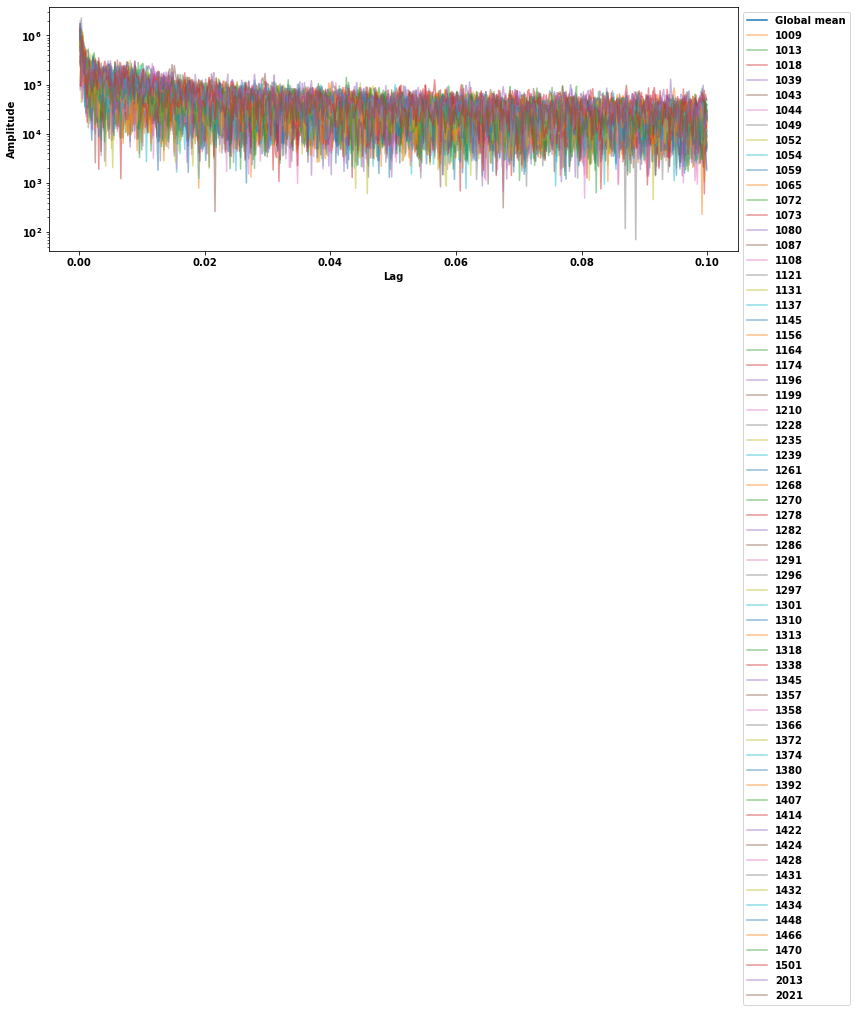

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in ms_outliers_idx_FFT:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Amplitude')
ax.set_yscale('log')
fig.tight_layout()
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MSPlot_outliers.pdf")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MSPlot_outliers.png")

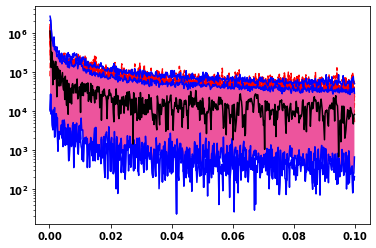

In [42]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
mbd_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_boxplot.plot()
plt.yscale('log')
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MBD_Boxplot.pdf")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MBD_Boxplot.png")

In [43]:
mbd_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.ModifiedBandDepth())
mbd_outliers_idx_FFT = X.index[np.where(mbd_outlier_detector.fit_predict(X_fd) == -1, True, False)]
mbd_outliers_idx_FFT

Int64Index([1164, 1196, 1199, 1291, 1338, 1383, 1407, 2013, 2021], dtype='int64')

In [44]:
y[mbd_outliers_idx_FFT].value_counts()

1    5
0    4
Name: ph, dtype: int64

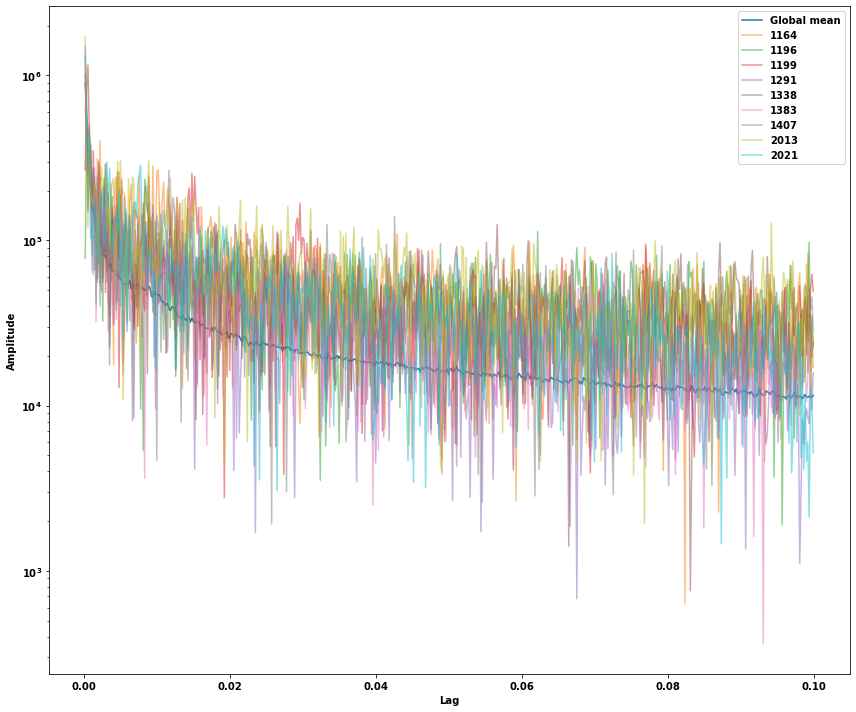

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in mbd_outliers_idx_FFT:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Amplitude')
ax.set_yscale('log')
fig.tight_layout()
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MBD_Boxplot_outliers.pdf")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_MBD_Boxplot_outliers.png")

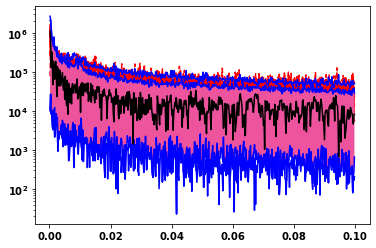

In [46]:
X_fd = skfda.FDataGrid(X, grid_points=X.columns)
id_boxplot = skfda.exploratory.visualization.Boxplot(X_fd, depth_method=skfda.exploratory.depth.IntegratedDepth())
id_boxplot.plot()
plt.yscale('log')
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_ID_Boxplot.pdf")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_ID_Boxplot.png")

In [47]:
id_outlier_detector = skfda.exploratory.outliers.BoxplotOutlierDetector(depth_method=skfda.exploratory.depth.IntegratedDepth())
id_outliers_idx_FFT = X.index[np.where(id_outlier_detector.fit_predict(X_fd) == -1, True, False)]
id_outliers_idx_FFT

Int64Index([1164, 1196, 1199, 1291, 1338, 1383, 1407, 1501, 2013, 2021], dtype='int64')

In [48]:
y[id_outliers_idx_FFT].value_counts()

1    6
0    4
Name: ph, dtype: int64

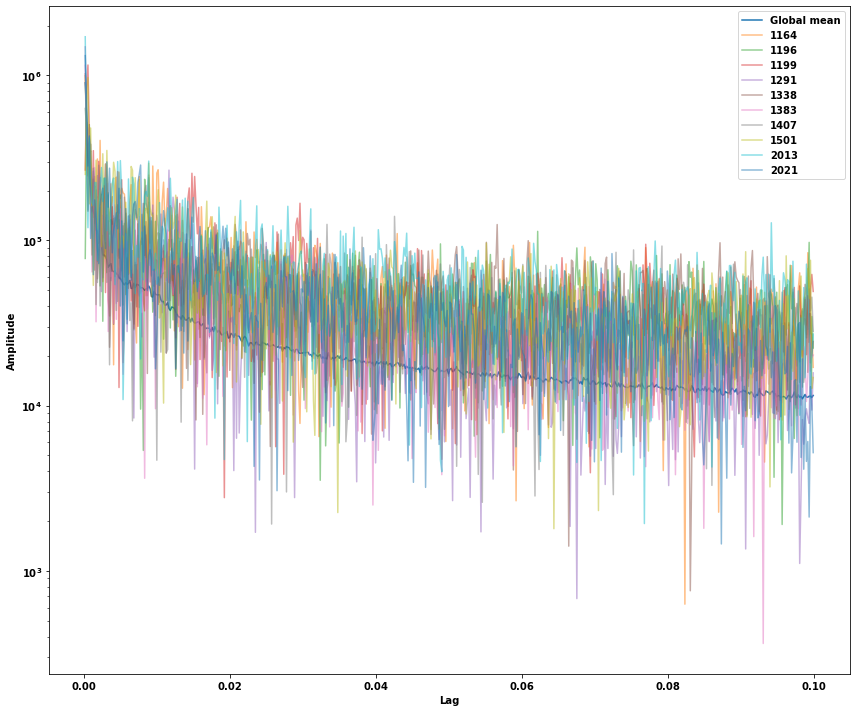

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.plot(X.mean().index, X.mean().values, label='Global mean')

for idx in id_outliers_idx_FFT:
    ax.plot(X.loc[idx].index, X.loc[idx].values, alpha=0.5, label=idx)

# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Lag')
ax.set_ylabel('Amplitude')
ax.set_yscale('log')
fig.tight_layout()
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_ID_Boxplot_outliers.pdf")
plt.savefig(f"{paths.FFT_DATA_PLOTS}/FFT_ID_Boxplot_outliers.png")

In [50]:
print([(x in ms_outliers_idx_CC) for x in id_outliers_idx_CC])
print([(x in ms_outliers_idx_CDCOR) for x in id_outliers_idx_CDCOR])
print([(x in ms_outliers_idx_FFT) for x in id_outliers_idx_FFT])

[]
[True, True, True]
[True, True, True, True, True, False, True, True, True, True]


In [51]:
outlier_idx = np.array(list(set(ms_outliers_idx_CC).union(set(ms_outliers_idx_CDCOR)).union(set(ms_outliers_idx_FFT))))
len(outlier_idx), outlier_idx

(96,
 array([1282, 1027, 1286, 1035, 1291, 1039, 1296, 1297, 1043, 1044, 1045,
        1302, 1047, 1301, 1049, 1306, 1052, 1054, 1055, 1312, 1311, 1310,
        1313, 1059, 1278, 1318, 1065, 1066, 1072, 1073, 1330, 1080, 1338,
        1086, 1087, 1345, 1350, 1357, 1358, 1108, 1366, 1372, 1374, 1120,
        1121, 1380, 1131, 1392, 1137, 1397, 1145, 1147, 1407, 1156, 1157,
        1414, 1415, 1164, 1422, 1424, 1428, 1174, 1431, 1432, 1434, 1181,
        1440, 1189, 1448, 1196, 1197, 1198, 1199, 1458, 1210, 1466, 1469,
        1470, 1228, 1235, 1495, 1239, 2012, 1501, 2013, 2021, 2024, 1261,
        1009, 2035, 1268, 1013, 1270, 1018, 1019, 1022]))

In [52]:
X_CC = pd.read_pickle(f'{paths.CC_DATA_PATH}/X.pickle')
X_CDCOR = pd.read_pickle(f'{paths.CDCOR_DATA_PATH}/X.pickle')
X_FFT = pd.read_pickle(f'{paths.FFT_DATA_PATH}/X.pickle')
y = pd.read_pickle(f'{paths.CC_DATA_PATH}/y.pickle')

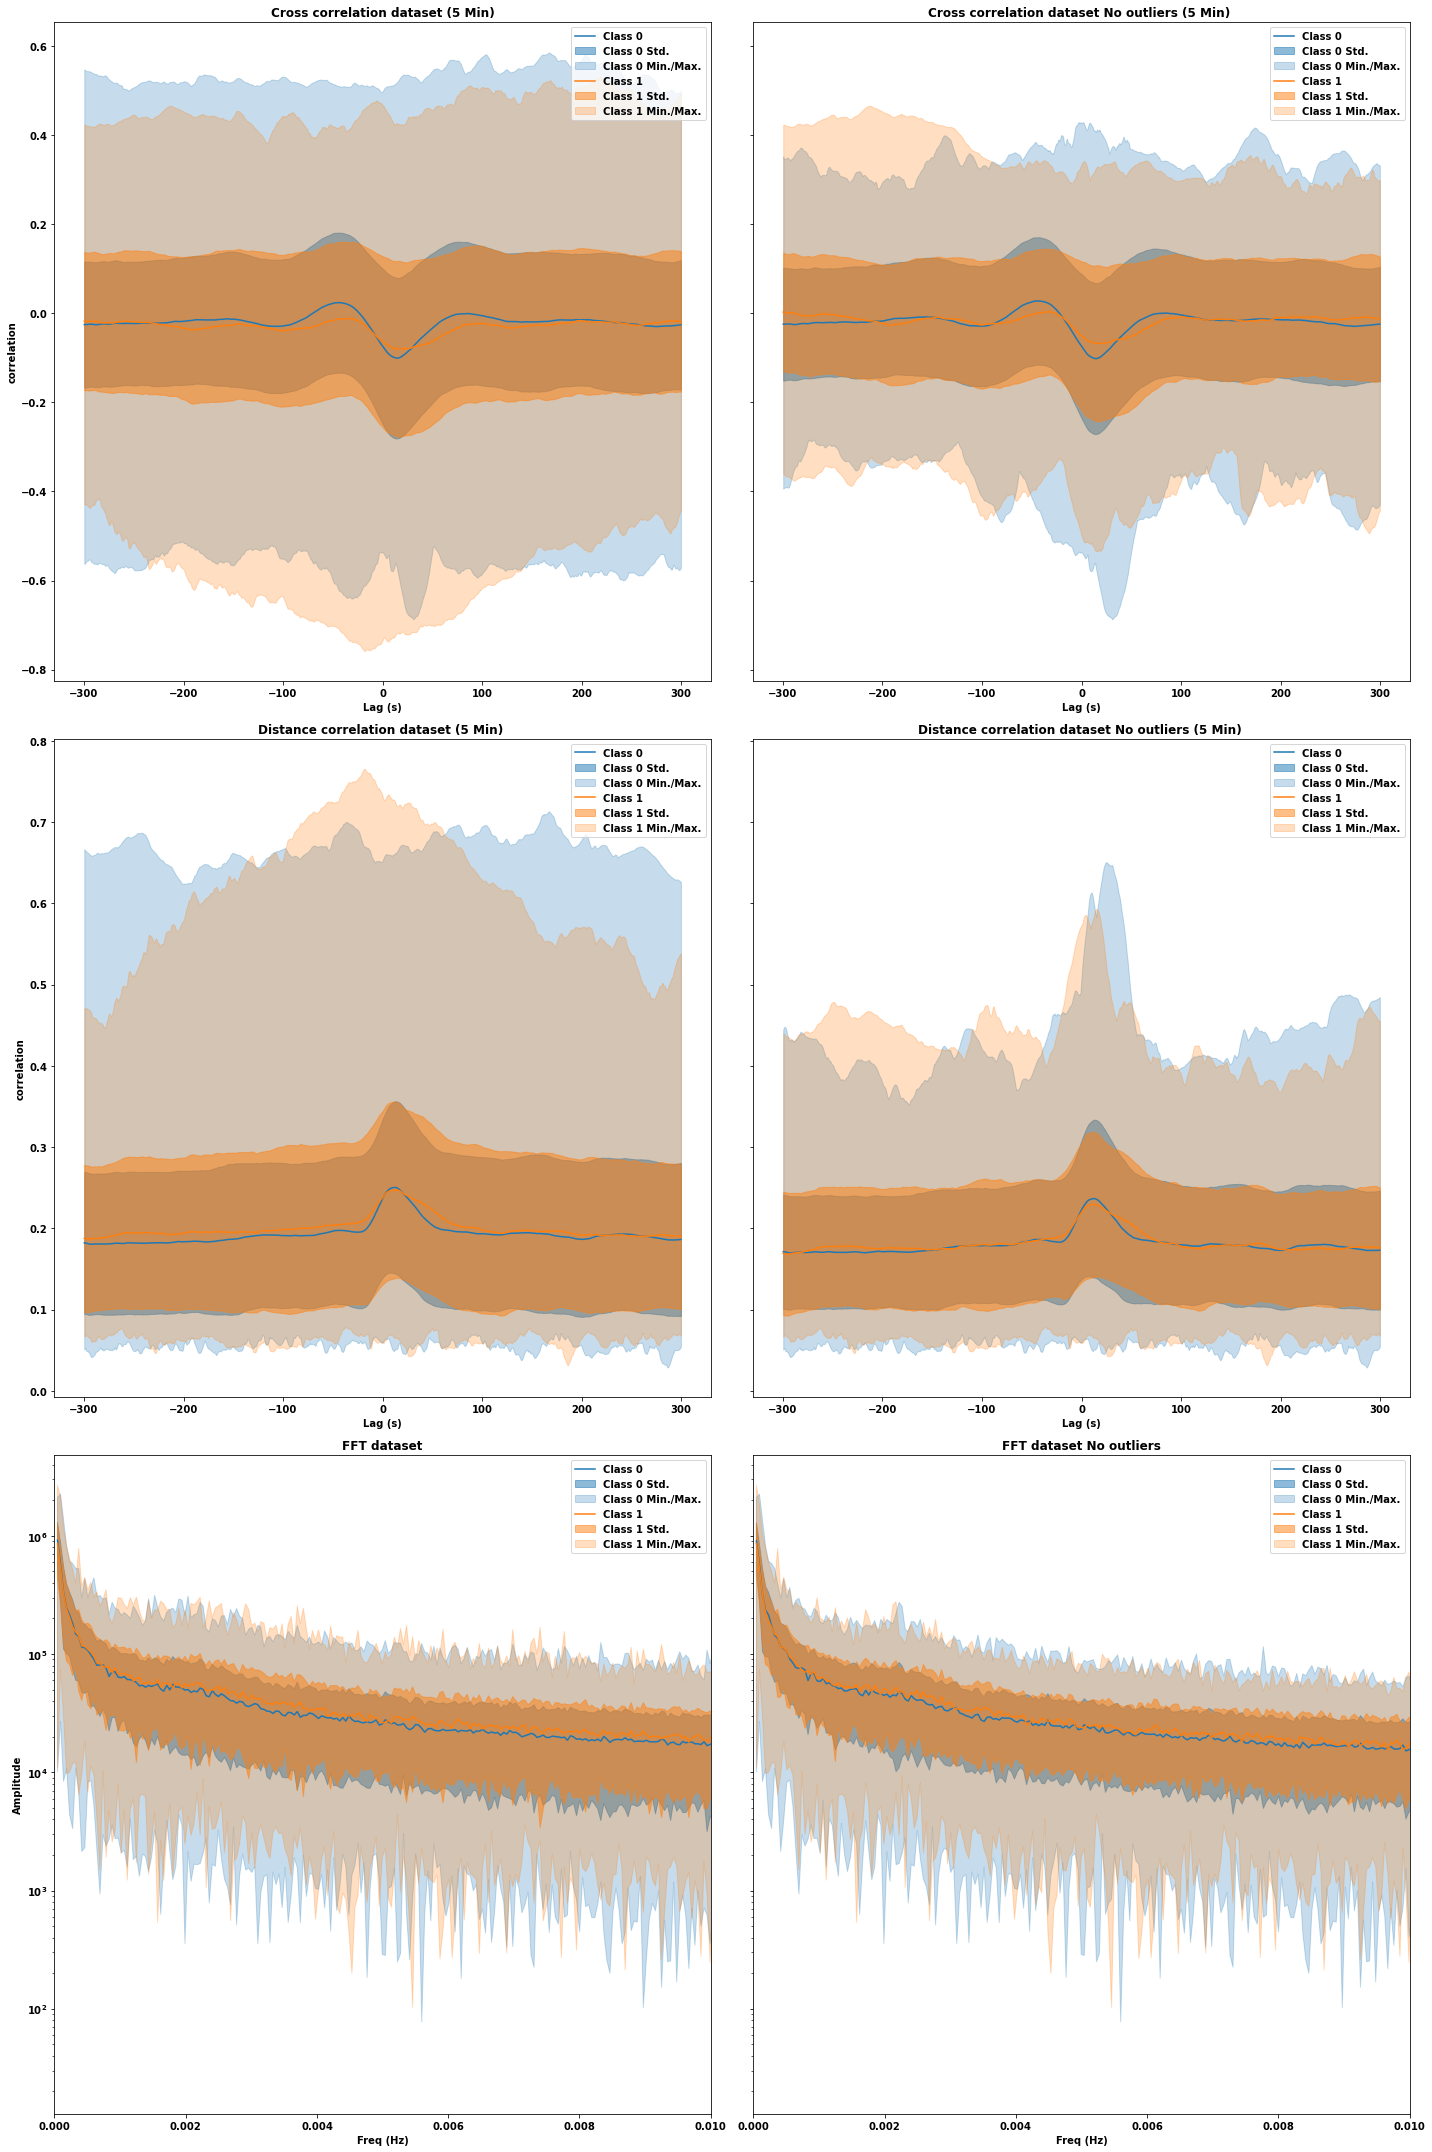

In [53]:
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 30), sharey='row')

tt = X_CC.columns
## CC ##
# Outliers
cc_0 = X_CC.copy()[y == 0]
mean_0 = cc_0.mean().values
std_0 = cc_0.std().values
max_0 = cc_0.max().values
min_0 = cc_0.min().values

cc_1 = X_CC.copy()[y == 1]
mean_1 = cc_1.mean().values
std_1 = cc_1.std().values
max_1 = cc_1.max().values
min_1 = cc_1.min().values

ax[0, 0].plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax[0, 0].fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])
ax[0, 0].fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax[0, 0].plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax[0, 0].fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax[0, 0].fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax[0, 0].legend(loc='best')
ax[0, 0].set_title(f"Cross correlation dataset (5 Min)")
ax[0, 0].set_ylabel(f"correlation")
ax[0, 0].set_xlabel("Lag (s)")

## CC ##
# No outliers
cc_0 = X_CC.drop(outlier_idx).copy()[y.drop(outlier_idx) == 0]
mean_0 = cc_0.mean().values
std_0 = cc_0.std().values
max_0 = cc_0.max().values
min_0 = cc_0.min().values

cc_1 = X_CC.drop(outlier_idx).copy()[y.drop(outlier_idx)  == 1]
mean_1 = cc_1.mean().values
std_1 = cc_1.std().values
max_1 = cc_1.max().values
min_1 = cc_1.min().values

ax[0, 1].plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax[0, 1].fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])
ax[0, 1].fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax[0, 1].plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax[0, 1].fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax[0, 1].fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax[0, 1].legend(loc='best')
ax[0, 1].set_title(f"Cross correlation dataset No outliers (5 Min) ")
ax[0, 1].set_xlabel("Lag (s)")

## CDCOR ##
# Outliers
cdcor_0 = X_CDCOR.copy()[y == 0]
mean_0 = cdcor_0.mean().values
std_0 = cdcor_0.std().values
max_0 = cdcor_0.max().values
min_0 = cdcor_0.min().values

cdcor_1 = X_CDCOR.copy()[y == 1]
mean_1 = cdcor_1.mean().values
std_1 = cdcor_1.std().values
max_1 = cdcor_1.max().values
min_1 = cdcor_1.min().values

ax[1, 0].plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax[1, 0].fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])
ax[1, 0].fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax[1, 0].plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax[1, 0].fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax[1, 0].fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax[1, 0].legend(loc='best')
ax[1, 0].set_title(f"Distance correlation dataset (5 Min) ")
ax[1, 0].set_ylabel(f"correlation")
ax[1, 0].set_xlabel("Lag (s)")

## CDCOR ##
# No outliers
cdcor_0 = X_CDCOR.drop(outlier_idx).copy()[y.drop(outlier_idx)  == 0]
mean_0 = cdcor_0.mean().values
std_0 = cdcor_0.std().values
max_0 = cdcor_0.max().values
min_0 = cdcor_0.min().values

cdcor_1 = X_CDCOR.drop(outlier_idx).copy()[y.drop(outlier_idx)  == 1]
mean_1 = cdcor_1.mean().values
std_1 = cdcor_1.std().values
max_1 = cdcor_1.max().values
min_1 = cdcor_1.min().values

ax[1, 1].plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax[1, 1].fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])
ax[1, 1].fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax[1, 1].plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax[1, 1].fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax[1, 1].fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax[1, 1].legend(loc='best')
ax[1, 1].set_title(f"Distance correlation dataset No outliers (5 Min) ")
ax[1, 1].set_xlabel("Lag (s)")



## FFT ##
# Outliers
tt  = X_FFT.columns
fft_0 = X_FFT.copy()[y == 0]
mean_0 = fft_0.mean().values
std_0 = fft_0.std().values
max_0 = fft_0.max().values
min_0 = fft_0.min().values

fft_1 = X_FFT.copy()[y == 1]
mean_1 = fft_1.mean().values
std_1 = fft_1.std().values
max_1 = fft_1.max().values
min_1 = fft_1.min().values

ax[2, 0].plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax[2, 0].fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])
ax[2, 0].fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax[2, 0].plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax[2, 0].fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax[2, 0].fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax[2, 0].set_yscale('log')

ax[2, 0].legend(loc='best')
ax[2, 0].set_title(f"FFT dataset")
ax[2, 0].set_ylabel(f"Amplitude")
ax[2, 0].set_xlabel("Freq (Hz)")
ax[2, 0].set_xlim((0,0.01))

## FFT ##
# No outliers
cdcor_0 = X_FFT.drop(outlier_idx).copy()[y.drop(outlier_idx)  == 0]
mean_0 = cdcor_0.mean().values
std_0 = cdcor_0.std().values
max_0 = cdcor_0.max().values
min_0 = cdcor_0.min().values

cdcor_1 = X_FFT.drop(outlier_idx).copy()[y.drop(outlier_idx)  == 1]
mean_1 = cdcor_1.mean().values
std_1 = cdcor_1.std().values
max_1 = cdcor_1.max().values
min_1 = cdcor_1.min().values

ax[2, 1].plot(tt / 4, mean_0, label='Class 0', color=COLORS[0])
ax[2, 1].fill_between(tt / 4, mean_0 - std_0, mean_0 + std_0, label='Class 0 Std.', alpha=0.5, color=COLORS[0])
ax[2, 1].fill_between(tt / 4, min_0, max_0, label='Class 0 Min./Max.', alpha=0.25, color=COLORS[0])

ax[2, 1].plot(tt / 4, mean_1, label='Class 1', color=COLORS[1])
ax[2, 1].fill_between(tt / 4, mean_1 - std_1, mean_1 + std_1, label='Class 1 Std.', alpha=0.5, color=COLORS[1])
ax[2, 1].fill_between(tt / 4, min_1, max_1, label='Class 1 Min./Max.', alpha=0.25, color=COLORS[1])

ax[2, 1].set_yscale('log')

ax[2, 1].legend(loc='best')
ax[2, 1].set_title(f"FFT dataset No outliers")
ax[2, 1].set_xlabel("Freq (Hz)")
ax[2, 1].set_xlim((0,0.01))

fig.tight_layout()
plt.savefig('Outiliers.pdf')

In [54]:
y.drop(outlier_idx).value_counts(), y[outlier_idx].value_counts()

(0    309
 1    131
 Name: ph, dtype: int64,
 0    57
 1    39
 Name: ph, dtype: int64)